# 8-5 Naive Bayes Classifier의 이해 - 영문

 문장을 **긍정(pos), 부정(neg)** 이라는 태그로 나눠 문장이 긍정적인 의미인지 부정적인 의미인지를 분류기가 알 수 있도록 지도 학습 시킨다.

In [1]:
from nltk.tokenize import word_tokenize
import nltk

In [2]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [3]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [4]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
    for x in train]
t

[({'me': False,
   'like': True,
   'you': True,
   'hate': False,
   'her': False,
   'i': True},
  'pos'),
 ({'me': False,
   'like': False,
   'you': True,
   'hate': True,
   'her': False,
   'i': True},
  'neg'),
 ({'me': True,
   'like': True,
   'you': True,
   'hate': False,
   'her': False,
   'i': False},
  'neg'),
 ({'me': False,
   'like': True,
   'you': False,
   'hate': False,
   'her': True,
   'i': True},
  'pos')]

In [5]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0


In [6]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'me': False,
 'like': True,
 'you': False,
 'hate': False,
 'her': False,
 'i': True}

In [7]:
classifier.classify(test_sent_features)

'pos'

# 8-6 Naive Bayes Classifier의 이해 - 한글

한글은 영어와 다르게 형태소를 분석하지 않으면 분석기가 같은 의미의 단어를 다른 단어로 인식할 수 있다.

In [9]:
# 한글의 형태소 분석을 위한 Twitter을 포함시킨다.
from konlpy.tag import Twitter
pos_tagger = Twitter()

C:\Users\lenovo\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [11]:
all_words = set(word.lower() for sentence in train
                for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [12]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
    for x in train]
t

[({'메리는': False,
   '놀거야': False,
   '좋아': True,
   '고양이야': False,
   '고양이도': False,
   '메리랑': False,
   '이쁜': False,
   '수업이': False,
   '메리가': True,
   '마치고': False,
   '난': False,
   '지루해': False},
  'pos'),
 ({'메리는': False,
   '놀거야': False,
   '좋아': True,
   '고양이야': False,
   '고양이도': True,
   '메리랑': False,
   '이쁜': False,
   '수업이': False,
   '메리가': False,
   '마치고': False,
   '난': False,
   '지루해': False},
  'pos'),
 ({'메리는': False,
   '놀거야': False,
   '좋아': False,
   '고양이야': False,
   '고양이도': False,
   '메리랑': False,
   '이쁜': False,
   '수업이': True,
   '메리가': False,
   '마치고': False,
   '난': True,
   '지루해': True},
  'neg'),
 ({'메리는': True,
   '놀거야': False,
   '좋아': False,
   '고양이야': True,
   '고양이도': False,
   '메리랑': False,
   '이쁜': True,
   '수업이': False,
   '메리가': False,
   '마치고': False,
   '난': False,
   '지루해': False},
  'pos'),
 ({'메리는': False,
   '놀거야': True,
   '좋아': False,
   '고양이야': False,
   '고양이도': False,
   '메리랑': True,
   '이쁜': False,
   '수업이': False,
   '메리가': False,
   '마치고

In [13]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0


In [14]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [15]:
test_sent_features = {word.lower():
                     (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'메리는': False,
 '놀거야': True,
 '좋아': False,
 '고양이야': False,
 '고양이도': False,
 '메리랑': True,
 '이쁜': False,
 '수업이': True,
 '메리가': False,
 '마치고': False,
 '난': True,
 '지루해': False}

In [16]:
classifier.classify(test_sent_features)

'neg'

In [17]:
def tokenize(doc) :
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [18]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [19]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [20]:
def term_exists(doc) :
    return {word: (word in set(doc)) for word in tokens}

In [21]:
for d,c in train_docs :
    print(d)
    print()
    print(c)

['메리/Noun', '가/Josa', '좋다/Adjective']

pos
['고양이/Noun', '도/Josa', '좋다/Adjective']

pos
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective']

neg
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa']

pos
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb']

pos


In [22]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [23]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [24]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [25]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [26]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [27]:
classifier.classify(test_sent_features)

'pos'

# 8-7 문장의 유사도 측정하기

In [57]:
# scikit-learn에서 텍스트의 특징을 추출하는 모듈에서
# CountVertorizer 라는 문장을 벡터로 표현하는 함수를 import한다.
# min_df : 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)

In [58]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [59]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [60]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [61]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

첫 번째 열이 첫 번째 문장에 대한 벡터 값인데 위에서 나눠 저장한 말뭉치들과 비교해 일치하는 것은 1로 일치하지 않는 것은 0으로 저장한다.

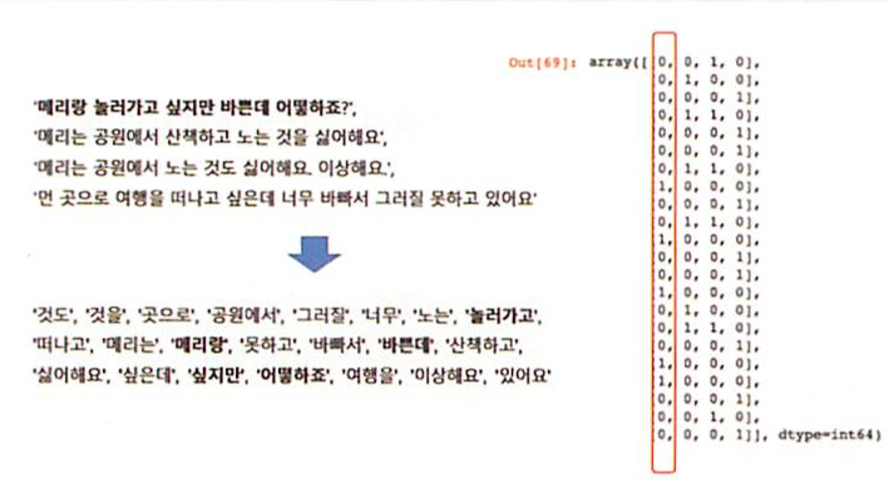

In [62]:
# 한글 문장의 형태소를 분석하기 위해서 Twitter을 import 시킨다.
from konlpy.tag import Twitter
t = Twitter()

C:\Users\lenovo\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [63]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [64]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [65]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [66]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [67]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [68]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [69]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [70]:
import scipy as sp

def dist_raw(v1, v2) :
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [71]:
best_doc = None
best_dist = 65535
best_i = None

In [72]:
for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist = %.2f : %s" %(i, d, contents[i]))
    
    if d < best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist = 3.00 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist = 1.00 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist = 2.00 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist = 3.46 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [74]:
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [76]:
for i in range(0, len(contents)) :
    print(X.getrow(i).toarray())

print('-------------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
-------------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [77]:
def dist_norm(v1, v2) :
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [79]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print('== Post %i with dist=%.2f  : %s' %(i, d, contents[i]))
    
    if d < best_dist :
        best_dist = d
        best_i = i

== Post 0 with dist=1.28  : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42  : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89  : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30  : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [80]:
print('Best post is %i, dict = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dict = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


TF와 IDF라는 개념을 사용하여 단어의 중요도를 체크한다.
* **TF(term frequency, 단어 빈도)** : 어떤 단어가 문서 내에서 얼마나 자주 등장하는지 나타내는 값
* **IDF(inverse document frequency, 역문서 빈도)** : 한 단어가 문서 집합 전체에서 얼마나 공통적으로 나타나는지를 나타내는 값.

In [81]:
def tfidf(t, d, D) :
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D))/ (len([doc for doc in D if t in doc])))
    return tf, idf

In [82]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [98]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens :
    sentence = ''
    for word in content :
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [99]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [100]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens :
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [101]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [103]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples) :
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print('== Post %i with dist = %.2f  : %s' %(i, d, contents[i]))

== Post 0 with dist = 0.90  : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist = 1.18  : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist = 1.16  : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist = 1.41  : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


# 8-8 여자친구 선물 고르기

In [104]:
# 데이터 프레임을 위한 pandas
# 합계, 평균 등 계산을 위한 numpy
# 운영체제 확인을 위한 platform
# 그래프를 그리기 위한 matplotlib
# 폰트 설정
# url을 다루기 위한 BeautifulSoup, urlopen, urllib
# 시간 함수를 위한 time
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

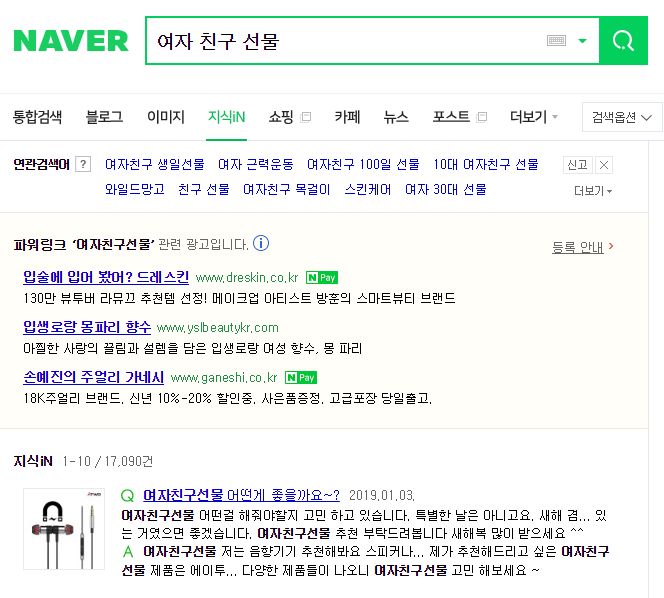
* 네이버에 여자 친구 선물 이라고 검색한 뒤 지식인을 클릭합니다.

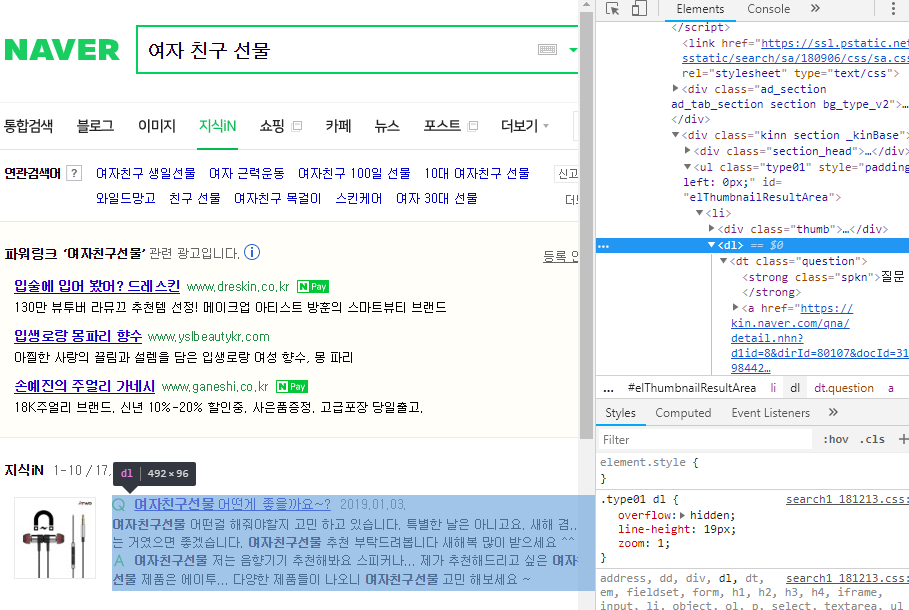
* 개발자 도구를 실행시키고 지식인의 답변의 태그를 확인해보면 **dl** 이란 것을
    알 수 있습니다.

In [105]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [109]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자 목걸이   스마트 마스크   임보라 샤넬 가방   여친 목걸이   임보라 샤넬백   스윙스 여친   입술보습제   키엘 립밤   스톤헨지 목걸이   목걸이세트     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  화이트데이 여친 선물 몇개만여~   2017.03.05.   ㅠㅠ 인제 화이트데이 여친 선물을 또 준비 ㅠㅠ 이쁜 화이트데이 여친 선물... 화이트데이 여친 선물들중에서 싸면서 좀 알찬거 없을까여?? 인형은 빼고 알려주세여~ 뽑기...   답변 화이트데이 여친 선물 질문을 하신거보니 찾으시다가 답답해서 올리신것 같습니다.^^ 화이트데이 여친 선물로... 제가 말씀드릴 화이트데이 여친 선물들은 꽃,사탕,초콜릿...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  화이트데이 여친선물 추천좀해주세요   2018.03.06.   이제 곧 화이트데이잖아요 그래서 화이트데이 여친선물... 화이트데이 여친선물로 좋은거 해주고싶은데... 사탕만 주기는 좀 민망하네요;; 일단 지금 화이트데이 여친선물...   답변 화이트데이 여친선물 준비하느라 정신없으시겠어요 ..... 그외에 화이트데이 여친선물로 저는 향수정도... 제가

In [124]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    
    soup = BeautifulSoup(response, 'html.parser')
    
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [125]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구 생일선물   여자 근력운동   여자친구 100일 선물   10대 여자친구 선물   와일드망고   친구 선물   여자친구 목걸이   스킨케어   여자 30대 선물   20대 여자친구 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구선물 어떤게 좋을까요~?   2019.01.03.   여자친구선물 어떤걸 해줘야할지 고민 하고 있습니다. 특별한 날은 아니고요. 새해 겸... 있는 거였으면 좋겠습니다. 여자친구선물 추천 부탁드려봅니다 새해복 많이 받으세요 ^^   답변 여자친구선물 저는 음향기기 추천해봐요 스피커나... 제가 추천해드리고 싶은 여자친구선물 제품은 에이투... 다양한 제품들이 나오니 여자친구선물 고민 해보세요 ~      ',
 '  질문  여자친구선물 괜찮은거 있어요? (30대 전후)   2018.10.29.   생각나는 여자친구선물이 없네요ㅠ 저는 가격은 큰 상관없지만 이번생일에는 특별하고 간직할 만한 여자친구선물이면 좋을거같아요. 여자친구선물 추천 좀 꼭...   답변 벌써 여자친구선물을 사야할 때가왔나? 그래도 마음을... 보다 여자친구선물로 높은 선호도가 있어요. 전... 노미네이션을 여자친구선물로 추천하는 이유는 여친과의...      ',
 '  질문  여자친구 선물 뭐가좋을까요?   2019.01.05.   여자친구 선물 뭐가좋을까요? 아직 만난지 12일된 새내기 커플입니다. 제가 직업군인이라 손이 트고 건조하고그러는데 여자친구가 에뛰드하우스에서 핸드크림을...   답변 요즘 핫하던데 저도 에코팜이라는 회사에서 선물용도로 샀는데 좋더라고용 가서 한번 보세요~ 후기

In [126]:
import nltk
from konlpy.tag import Twitter
t = Twitter()

C:\Users\lenovo\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [127]:
present_text = ''

for each_line in present_candi_text[:1000]:
    present_text = present_text + each_line + '\n'

In [128]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '와일드',
 '망고',
 '친구',
 '선물',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '여자친구',
 '선물',
 '어떤게',
 '좋을까요',
 '~?',
 '2019.01',
 '.',
 '03',
 '.',
 '여자친구',
 '선물',
 '어떤',
 '걸',
 '해줘',
 '야할지',
 '고민',
 '하고',
 '있습니다',
 '.',
 '특별한',
 '날',
 '은',
 '아니고요',
 '.',
 '새해',
 '겸',
 '...',
 '있는',
 '거',
 '였으면',
 '좋겠습니다',
 '.',
 '여자친구

In [131]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

62699
400


In [133]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(100)

[('선물', 3769),
 ('여자친구', 3309),
 ('.', 2923),
 ('...', 1770),
 ('가', 1308),
 ('추천', 1078),
 ('로', 999),
 ('질문', 769),
 ('답변', 769),
 ('을', 693),
 ('도', 693),
 ('를', 616),
 ('대', 616),
 ('?', 616),
 ('는', 539),
 ('저', 539),
 ('시계', 537),
 ('목걸이', 536),
 ('고민', 462),
 ('안녕하세요', 461),
 ('나', 458),
 ('단어', 385),
 ('20', 385),
 ('은', 385),
 ('향수', 385),
 ('한', 384),
 ('좀', 384),
 ('검색', 308),
 ('하는', 308),
 ('의', 308),
 ('여자', 308),
 ('후', 308),
 ('좋을까요', 308),
 ('에서', 308),
 ('에', 308),
 ('입력', 231),
 ('된', 231),
 ('때', 231),
 ('2019.01', 231),
 ('걸', 231),
 ('거', 231),
 ('제품', 231),
 ('들', 231),
 ('이', 231),
 ('~', 231),
 ('있어요', 231),
 ('이번', 231),
 ('만', 231),
 ('뭐', 231),
 ('입니다', 231),
 ('..', 231),
 ('요', 231),
 ('하는데', 229),
 ('팔찌', 229),
 ('포함', 154),
 ('기', 154),
 ('할', 154),
 ('사용', 154),
 ('합니다', 154),
 ('연관검색어', 154),
 ('생일', 154),
 ('100일', 154),
 ('30', 154),
 ('어떤', 154),
 ('있습니다', 154),
 ('새해', 154),
 ('^^', 154),
 ('제', 154),
 ('괜찮은', 154),
 ('2018.10', 154),
 ('29', 154),

In [135]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 3769),
 ('여자친구', 3309),
 ('추천', 1078),
 ('저', 539),
 ('시계', 537),
 ('목걸이', 536),
 ('고민', 462),
 ('안녕하세요', 461),
 ('나', 458),
 ('향수', 385),
 ('검색', 308),
 ('여자', 308),
 ('좋을까요', 308),
 ('에서', 308),
 ('입력', 231),
 ('된', 231),
 ('2019.01', 231),
 ('걸', 231),
 ('제품', 231),
 ('있어요', 231),
 ('이번', 231),
 ('만', 231),
 ('입니다', 231),
 ('하는데', 229),
 ('팔찌', 229),
 ('포함', 154),
 ('기', 154),
 ('사용', 154),
 ('합니다', 154),
 ('연관검색어', 154),
 ('생일', 154),
 ('100일', 154),
 ('30', 154),
 ('있습니다', 154),
 ('새해', 154),
 ('^^', 154),
 ('괜찮은', 154),
 ('2018.10', 154),
 ('29', 154),
 ('이면', 154),
 ('05', 154),
 ('군인', 154),
 ('해주세요', 154),
 ('과자', 154),
 ('같이', 154),
 ('리스', 154),
 ('좋아합니다', 154),
 ('5만원', 154),
 ('대선물로', 154),
 ('말고', 154)]

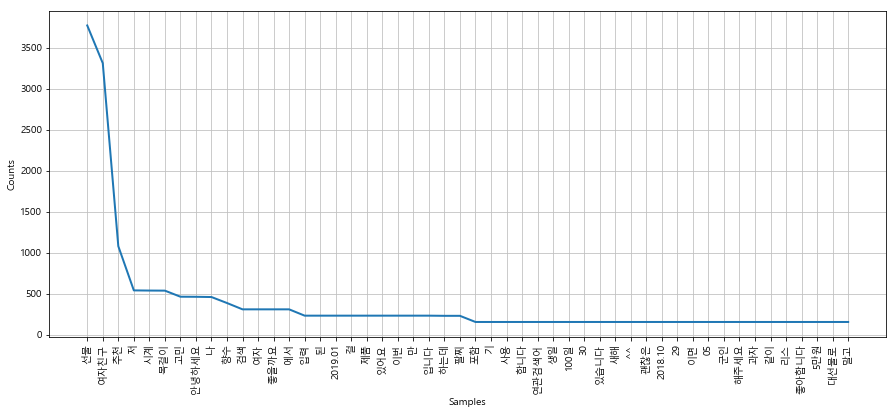

In [136]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [138]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

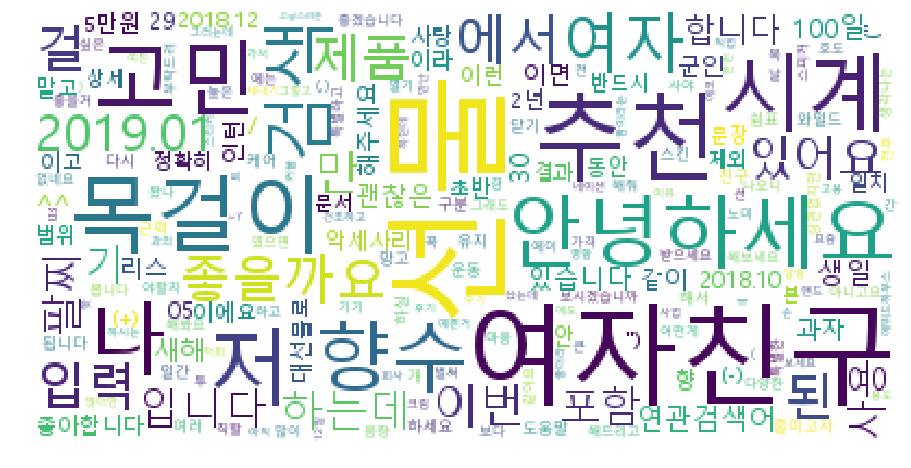

In [153]:
data = ko.vocab().most_common(300)

# for mac : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [140]:
mask = np.array(Image.open('./DataScience/data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [141]:
data = ko.vocab().most_common(200)

# for mac : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.1, mask=mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()

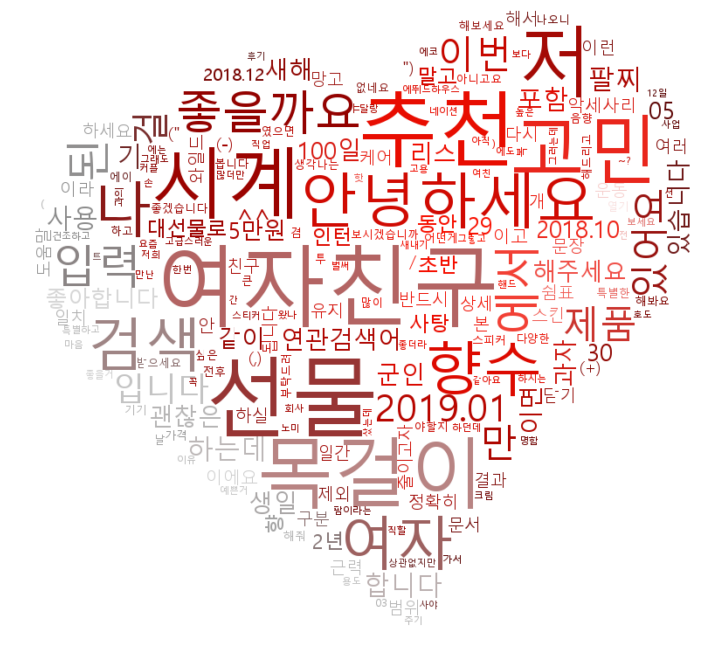

In [142]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [155]:
import gensim
from gensim.models import word2vec

C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [157]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    
    r1 = (' '.join(r)).strip()
    results.append(r1)
    print(r1)

C:\Users\lenovo\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보

질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다

질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여

질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전

질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 

질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다

질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 

질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 

질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 

질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다

연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저

질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다

질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여

질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전

질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 

질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입

질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 하다 귀걸이 선물 괜찮다 용 사탕
질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다

질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 하지만 여자 들 경우 손목 시계 차지 않다 있다 여자 선물 악세다 리가 좋다 시계 목걸이 모두 좋다 목걸이
질문 화이트데이 여자친구 선물 추천 2018.02 26 사탕 별로 안 좋아하다 같다 다른 선물 괜찮다 거 뭐 있다 향수 답변 악세다 류 안녕하다 여자친구 악세사리 좋아하다 악세사리 괜찮다 시계 여유 되다 팔찌 선물 좋다 

질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 안녕하다 여자친구 선물 찾다 저 이렇다 아이템 추천 드리다 싶다 3 D 피 규어 알다 자기 자신 수십 대의 DSLR 카메라 360 도 스캔 받다 후
질문 20 대다 여자친구 선물 추천 부탁드리다 2018.11 05 20 대다 초반 여자친구 선물 고민 중 요 구찌 목걸이 로즈몽 탄생석 시계 죽 고민 중 요 어떤 걸 선물 하다 좋다 답변 남자 들 보통 시계 좋아하다 

질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다 이번 향수 찾다 같다 비싸다 답변 안녕하다 향수 보다 클린 향수 깨끗하다 느낌 향 상큼 오렌지 향 섞이다 여름 사용 하다 좋다 요 올리브영 할인 행사
질문 인턴 가다 여자친구 선물 2019.01 06 안녕하다 2년 사귀다 여자친구 해외 1년 동안 인턴 가다 2년 정도 사귀다 나이 20 대다 초반 이다 저 현재 군인 곧 휴가 10일 동안 나가다 제대 300일 답변 

질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 29900원 이면 살 수 있다 저 이번 선물 해주다 굉장하다 따뜻하다 여자친구 좋아하다 꽃
질문 5만원 대선물로 여자친구 선물 2018.06 25 안녕하다 20 대다 중반 남성 이다 5만원 대선물로 간단하다 여자친구 선물 해주다 싶다 향수 바디 미스트 뿌리다

연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 여자친구 선물 추천 좀 2018.12 13 100일 된 여자친구 선물 추천 좀 답변 후 리스 추천 드리다 유니클로 양털 후 리스 판매 하다 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다 후기 많다 사업 하다 여자친구 선물 추천 하다 저희 명함 스티커
질문 여자친구 선물 예쁘다 추천 해주다 2018.10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 같이 주다 여자친구 선물 과자 같이 줄 만 예쁘다 여자친구 선물 좀 추천 해주다 답변 여자친구 선물 뭘줄 고민 보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저

질문 여자친구 선물 팔찌 목걸이 시계 2018.12 09 여자친구 선물 팔찌 목걸이 시계 선물 하다 하다 안 변하다 액세서리 브랜드 좀 알다 답변 http://naver.me/x5hF3IDN 이런 목걸이 어떻다 14 k 금 가운데 흔들리다 댄싱 스톤 유니크 디자인 선물 하다 의미 있다 안녕하다
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 여자친구 선물 어떻다 좋다 2019.01 03 여자친구 선물 어떤 걸 해주다 야하다 고민 하다 있다 특별하다 날 아니다 새해 겸 있다 거 이다 좋다 여자친구 선물 추천 부탁드리다 보다 새해 복 많이 받다 답변 여자친구 선물 저 음향 기기 추천 해보다 스피커 제 추천 해드리다 싶다 여자친구 선물 제품 에이 투 다양하다 제품 들 나오니 여자친구 선물 고민 해보다
질문 여자친구 선물 괜찮다 거 있다 30 대다 전후 2018.10 29 생각나다 여자친구 선물 없다 ㅠ 저 가격 크다 상관없다 이번 생일 특별하다 간 직할 만 여자친구 선물 이면 좋다 같다 여자친구 선물 추천 좀 꼭 답변 벌써 여자친구 선물 사다 하다 때 오다 그래도 마음 보다 여자친구 선물 높다 선 호도 있다 전 노미 네이션 여자친구 선물 추천 하다 이유 여친
질문 여자친구 선물 뭐 좋다 2019.01 05 여자친구 선물 뭐 좋다 아직 만난 12일 된 새내기 커플 이다 제 직업 군인 손 트 건조하다 그렇다 여자친구 에뛰드하우스 핸드 크림 답변 요즘 핫 하다 저 에코 파다 회사 선물 용도 사다 좋다 고용 가다 한번 보다

In [159]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp :
    fp.write('\n'.join(results))

In [165]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

model.save('pres_girl.model')
model = word2vec.Word2Vec.load('pres_girl.model')

In [169]:
model.most_similar(positive=['선물'])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('여자친구', 0.6943821907043457),
 ('목걸이', 0.316720575094223),
 ('있다', 0.30309534072875977),
 ('악세다', 0.300803542137146),
 ('와일드', 0.29042112827301025),
 ('망고', 0.28858649730682373),
 ('10', 0.2876738905906677),
 ('여자', 0.2850682735443115),
 ('괜찮다', 0.283394455909729),
 ('추천', 0.2761594355106354)]

In [167]:
model.most_similar(positive=['여자친구'])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('선물', 0.6943821310997009),
 ('추천', 0.373025506734848),
 ('질문', 0.3658360242843628),
 ('고르다', 0.3651244640350342),
 ('대다', 0.3331017792224884),
 ('와일드', 0.3155788779258728),
 ('10', 0.3024987578392029),
 ('근력', 0.3003826141357422),
 ('고민', 0.2999736964702606),
 ('망고', 0.29665398597717285)]